# Exploratory Data Analysis - (EDA)

## Data Loading

In [1]:
# Imported Libraries 
import pandas as pd # pandas library 
import numpy as np # numpy library
import matplotlib.pyplot as plt # Import the pyplot (pythonplot) part of the matlotlib library
import seaborn as sns # seaborn library

In [2]:
### Global Perameters
# Show all dataframe columns
pd.set_option('display.max_columns', None)
# Set matplotlib global settings
plt.rcParams['figure.figsize'] = (8.0, 6.0)

In [3]:
### Helper Functions
# checks the data for everything stated below
def dq_checks(df):
    print("+----------DataFrame Quality Report----------+")
    n_rows, n_cols=df.shape
    n_nulls = df.isna().sum().sum() # 2 sums - total null values for all columns
    n_row_dups = df.duplicated().sum()
    n_col_dups = df.T.duplicated().sum() # transpost the column for a duplicated column
    return (
    f"""
    No. of rows: {n_rows}
    No. of columns: {n_cols}
    No. of missing values: {n_nulls}
    No. of duplicated rows: {n_row_dups}
    No. of duplicated columns: {n_col_dups}
    """
)

In [47]:
## Data Loading
# Data loading for github only

CLN_DATA_PATH='../data/heart_2022_with_nans.csv'

try:
    heart_attack_raw = pd.read_csv(CLN_DATA_PATH)
    print("Data loaded successfully.")
except FileNotFoundError:
    print("ERROR: The data file does not exist.")

Data loaded successfully.


---

## EDA

In [17]:
print("\033[1mCopying the Original Dataframe:\033[0m\n")

try:
    heart_attack_raw_copy_plot = heart_attack_raw.copy()
    print("Data copied successfully.")
except:
    print("ERROR: The data has NOT been copied.")

Copying the Original Dataframe:

Data copied successfully.


In [6]:
print("First 5 Rows of Data:\n")
display(heart_attack_raw.head())
print("\n\n")
print("Last 5 Rows of Data:")
display(heart_attack_raw.tail())

First 5 Rows of Data:



,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Never smoked,Not at all (right now),No,"White only, Non-Hispanic",Age 80 or older,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 55 to 59,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",NaN,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 40 to 44,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No





Last 5 Rows of Data:


,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
445127,Virgin Islands,Female,Good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,No,No,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"Black only, Non-Hispanic",Age 18 to 24,1.65,69.85,25.63,NaN,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
445128,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"Black only, Non-Hispanic",Age 50 to 54,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
445129,Virgin Islands,Female,Poor,30.0,30.0,5 or more years ago,No,5.0,1 to 5,No,No,No,No,No,No,No,No,No,No,No,No,NaN,No,No,No,Current smoker - now smokes every day,Use them some days,NaN,NaN,Age 65 to 69,1.70,49.90,17.23,NaN,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
445130,Virgin Islands,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,5.0,None of them,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"Black only, Non-Hispanic",Age 70 to 74,1.83,108.86,32.55,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
445131,Virgin Islands,Male,Very good,0.0,1.0,NaN,Yes,5.0,None of them,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,No,No,Former smoker,Not at all (right now),Yes,"Black only, Non-Hispanic",Age 40 to 44,1.68,63.50,22.60,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No


In [7]:
heart_attack_raw.shape

(445132, 40)

In [8]:
heart_attack_raw.index

RangeIndex(start=0, stop=445132, step=1)

In [9]:
heart_attack_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [10]:
heart_attack_raw.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


In [11]:
print(heart_attack_raw.columns.tolist())

['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities', 'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']


In [12]:
heart_attack_raw.head(0)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos


In [13]:
for column in heart_attack_raw:
    print(heart_attack_raw[column].value_counts())

State
Washington              26152
New York                17800
Minnesota               16821
Ohio                    16487
Maryland                16418
Texas                   14245
Florida                 13393
Wisconsin               11276
Kansas                  11247
Massachusetts           11029
California              10952
Maine                   10646
Indiana                 10466
Virginia                10417
Arizona                 10185
Michigan                10058
South Carolina          10037
Utah                     9826
Connecticut              9784
Colorado                 9365
Georgia                  9236
Iowa                     8949
Vermont                  8811
New Jersey               8209
Hawaii                   7747
Nebraska                 7473
Missouri                 7438
South Dakota             7424
Montana                  7048
New Hampshire            6757
Idaho                    6280
Rhode Island             5893
Alaska                   5865
Okla

**Checking for Duplicates and Null Values**

In [14]:
print(dq_checks(heart_attack_raw))

+----------DataFrame Quality Report----------+

    No. of rows: 445132
    No. of columns: 40
    No. of missing values: 902665
    No. of duplicated rows: 157
    No. of duplicated columns: 0
    


Duplicates

In [15]:
# How many duplicated rows are in the dataset
heart_attack_raw.duplicated().value_counts()

False    444975
True        157
Name: count, dtype: int64

In [16]:
print(f"Amount of Duplicate Rows in the Dataset: {heart_attack_raw.duplicated().sum()}")

Amount of Duplicate Rows in the Dataset: 157


In [17]:
print(f"Duplicate Percentage of the Dataset: {(heart_attack_raw.duplicated().sum() / (len(heart_attack_raw)) * 100).round(2)}%")

Duplicate Percentage of the Dataset: 0.04%


Null Values

In [18]:
print(f"Total Amount of Null Cells in the Dataset: {heart_attack_raw.isna().sum().sum()}")

Total Amount of Null Cells in the Dataset: 902665


In [19]:
print(f"\033[1mThe Amount of Null Cells in each Column:\033[0m\n\n\
{heart_attack_raw.isna().sum().sort_values(ascending=False)}")

The Amount of Null Cells in each Column:

TetanusLast10Tdap            82516
PneumoVaxEver                77040
HIVTesting                   66127
ChestScan                    56046
CovidPos                     50764
HighRiskLastYear             50623
BMI                          48806
FluVaxLast12                 47121
AlcoholDrinkers              46574
WeightInKilograms            42078
ECigaretteUsage              35660
SmokerStatus                 35462
HeightInMeters               28652
DifficultyErrands            25656
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
BlindOrVisionDifficulty      21564
DeafOrHardOfHearing          20647
RaceEthnicityCategory        14057
RemovedTeeth                 11360
PhysicalHealthDays           10927
AgeCategory                   9079
MentalHealthDays              9067
LastCheckupTime               8308
SleepHours                    5453
HadAngina                     4405
HadSkinCancer

In [20]:
print("\033[1mHeart Attack Raw - Null Percentage & Row Significance\033[0m\n")

for column in heart_attack_raw:

    null_percentage = ((heart_attack_raw[column].isna().sum() / (len(heart_attack_raw))) * 100).round(2)
    
    
    if null_percentage > 5:
        print(f"{column}: {null_percentage}% - Significant \n")

    else:
        print(f"{column}: {null_percentage}% - Not Significant\n")

Heart Attack Raw - Null Percentage & Row Significance

State: 0.0% - Not Significant

Sex: 0.0% - Not Significant

GeneralHealth: 0.27% - Not Significant

PhysicalHealthDays: 2.45% - Not Significant

MentalHealthDays: 2.04% - Not Significant

LastCheckupTime: 1.87% - Not Significant

PhysicalActivities: 0.25% - Not Significant

SleepHours: 1.23% - Not Significant

RemovedTeeth: 2.55% - Not Significant

HadHeartAttack: 0.69% - Not Significant

HadAngina: 0.99% - Not Significant

HadStroke: 0.35% - Not Significant

HadAsthma: 0.4% - Not Significant

HadSkinCancer: 0.71% - Not Significant

HadCOPD: 0.5% - Not Significant

HadDepressiveDisorder: 0.63% - Not Significant

HadKidneyDisease: 0.43% - Not Significant

HadArthritis: 0.59% - Not Significant

HadDiabetes: 0.24% - Not Significant

DeafOrHardOfHearing: 4.64% - Not Significant

BlindOrVisionDifficulty: 4.84% - Not Significant

DifficultyConcentrating: 5.45% - Significant 

DifficultyWalking: 5.39% - Significant 

DifficultyDressingBat

**Dealing with Duplictes and Null Values**

In [18]:
print("\033[1mCopying the Original Dataframe:\033[0m\n")

try:
    heart_attack_clean = heart_attack_raw_copy_plot.copy()
    print("Data copied successfully.")
except:
    print("ERROR: The data has NOT been copied.")

Copying the Original Dataframe:

Data copied successfully.


In [29]:
heart_attack_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 444975 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      444975 non-null  object 
 1   Sex                        444975 non-null  object 
 2   GeneralHealth              443782 non-null  object 
 3   PhysicalHealthDays         434053 non-null  float64
 4   MentalHealthDays           435913 non-null  float64
 5   LastCheckupTime            436674 non-null  object 
 6   PhysicalActivities         443887 non-null  object 
 7   SleepHours                 439527 non-null  float64
 8   RemovedTeeth               433620 non-null  object 
 9   HadHeartAttack             441915 non-null  object 
 10  HadAngina                  440575 non-null  object 
 11  HadStroke                  443423 non-null  object 
 12  HadAsthma                  443207 non-null  object 
 13  HadSkinCancer              441837 

**Duplicates:**

Through dataframe analysis, the ammount of rows that are duplicates count to 157. 

This is 0.04% of the total dataset, which is an insignificant amount. 

I will proceed in dropping the rows as doing so will NOT affect the overall quality of the data.

In [28]:
heart_attack_clean = heart_attack_raw_copy_plot.drop_duplicates()

**Checking the new DataFrame for any Duplicates**

In [30]:
heart_attack_clean.duplicated().sum()

0

**Null Values:**

There were 902665 null cells.

With a range of null cells in each column from < 5% - 18.54% of null values in a column.

This is % of the total dataset, which is

I will proceed to drop the rows, as the dataset is so big at 445132 rows and 40 columns, dropping the rows will still give a substantial dataset that can be used further.

In [31]:
heart_attack_clean = heart_attack_raw_copy_plot.dropna()

In [36]:
print(f'Number of Null Values Present: {heart_attack_clean.isna().sum().sum()}')

Number of Null Values Present: 0


<function matplotlib.pyplot.show(close=None, block=None)>

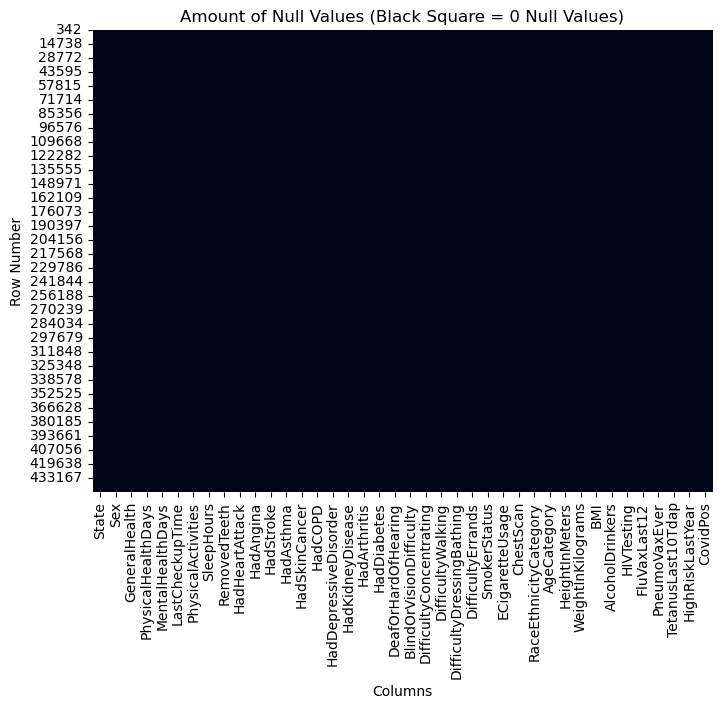

In [37]:
sns.heatmap(heart_attack_clean.isna(), cbar=False)
plt.title("Amount of Null Values (Black Square = 0 Null Values)")
plt.ylabel("Row Number")
plt.xlabel("Columns")
plt.show

**Duplicates & Null Values Comments**

- I now have no Duplicates or Null Values

**Column Analysis**

In [38]:
# Checking the copied data is loaded correctly
heart_attack_clean.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
342,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 65 to 69,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
343,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 70 to 74,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
345,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,No,No,No,No,No,No,No,Yes,No,No,Yes,No,Yes,No,No,Former smoker,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 75 to 79,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
346,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,No,No,No,Yes,No,Yes,No,Yes,No,No,No,No,Yes,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
347,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [39]:
heart_attack_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246022 entries, 342 to 445130
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24602

In [41]:
print(f"Columns in the dataset that contain floats:\n\n {heart_attack_clean.select_dtypes(include=[float]).columns}")

Columns in the dataset that contain floats:

 Index(['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
       'HeightInMeters', 'WeightInKilograms', 'BMI'],
      dtype='object')


Changing the data type to plot the frequencies of each column to check for any bias

In [42]:
heart_attack_clean = heart_attack_clean.astype({"PhysicalHealthDays": object,
                                                                "MentalHealthDays": object,
                                                                "SleepHours": object, 
                                                                "HeightInMeters": object,
                                                                "WeightInKilograms": object, 
                                                                "BMI": object})

Checking the dataframe types have been changed

In [43]:
heart_attack_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246022 entries, 342 to 445130
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   State                      246022 non-null  object
 1   Sex                        246022 non-null  object
 2   GeneralHealth              246022 non-null  object
 3   PhysicalHealthDays         246022 non-null  object
 4   MentalHealthDays           246022 non-null  object
 5   LastCheckupTime            246022 non-null  object
 6   PhysicalActivities         246022 non-null  object
 7   SleepHours                 246022 non-null  object
 8   RemovedTeeth               246022 non-null  object
 9   HadHeartAttack             246022 non-null  object
 10  HadAngina                  246022 non-null  object
 11  HadStroke                  246022 non-null  object
 12  HadAsthma                  246022 non-null  object
 13  HadSkinCancer              246022 non-null  obj

In [44]:
heart_attack_clean.head(1)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
342,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 65 to 69,1.6,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No


In [45]:
heart_attack_clean.nunique().sort_values(ascending=False)

BMI                          3514
WeightInKilograms             516
HeightInMeters                101
State                          54
PhysicalHealthDays             31
MentalHealthDays               31
SleepHours                     23
AgeCategory                    13
GeneralHealth                   5
RaceEthnicityCategory           5
HadDiabetes                     4
LastCheckupTime                 4
TetanusLast10Tdap               4
RemovedTeeth                    4
ECigaretteUsage                 4
SmokerStatus                    4
CovidPos                        3
HadArthritis                    2
HadAsthma                       2
HighRiskLastYear                2
PhysicalActivities              2
PneumoVaxEver                   2
FluVaxLast12                    2
HIVTesting                      2
AlcoholDrinkers                 2
HadHeartAttack                  2
HadAngina                       2
HadStroke                       2
HadSkinCancer                   2
HadKidneyDisea

Univatiate Analysis

Histogram Column Analysis


/var/folders/g1/4bcd3kq95wdbhhm1kpqr2q400000gn/T/ipykernel_34068/2373055800.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0)


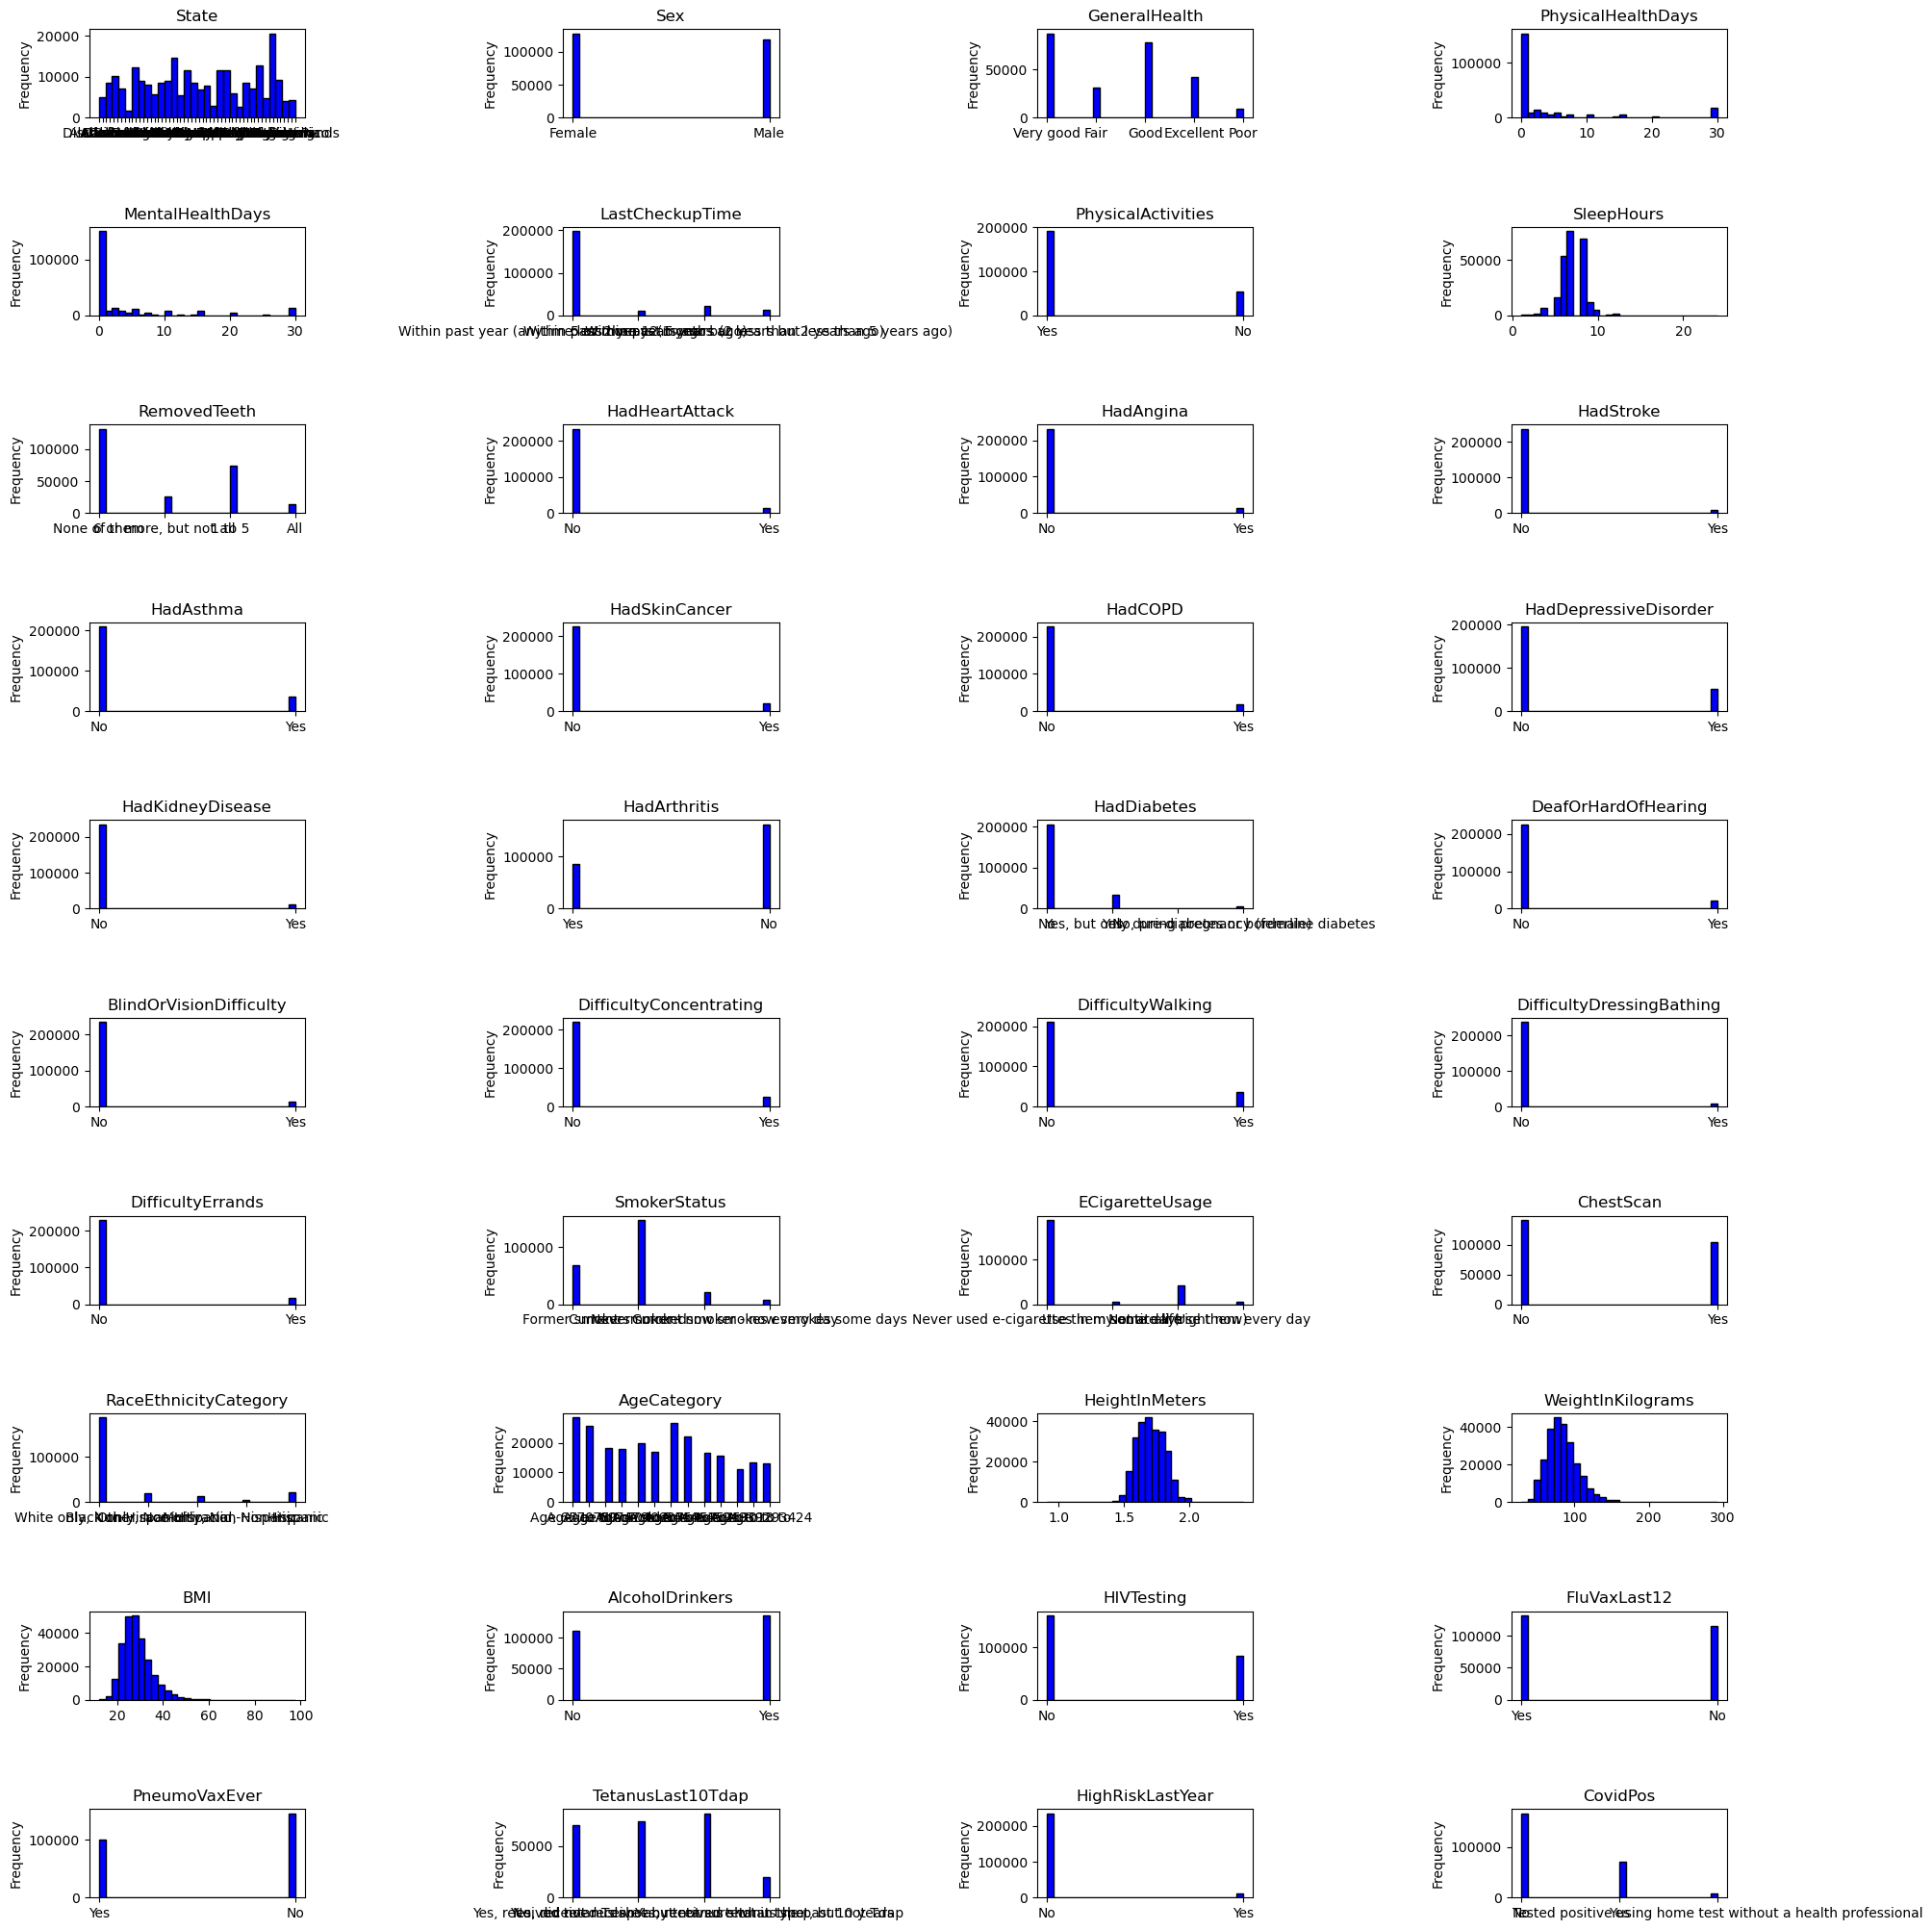

In [46]:
# Change
print("Histogram Column Analysis")

# Setting the subplot layouts
plt.subplots(10, 4, figsize=(20, 20))

# Plotting histograms
for i, column in enumerate(heart_attack_clean.columns, 1):
    plt.subplot(10, 4, i)
    plt.hist(heart_attack_clean[column].dropna(), bins= 30, color='blue', edgecolor="k")
    plt.title(column)
    plt.ylabel("Frequency")
    plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0)

**Graph Comments**

29 of the columns are good. They seem like normal responses on a good population split on each answer. Meaning the answers are split well, in the statistical sense through general research. 

Further analysis needed into each 11 column below:

*Columns*

- `HadHeartAttack` - **Target Column** - There is an imbalence in yes to no.

- `State` - There seems to be a high frequency in a particular State which needs to be investigated.
- `LastCheckupTime` - Checking the responses of the American public to see if any can be combined.
- `SleepHours` - There is a gap in the hours inbetween the 2 peaks, this needs to be investigated.
- `RemovedTeeth` - Checking the responses of the American public to see if any can be combined.
- `HadDiabetes` - One Response seems to be high and needs to be investigated along with the responses.
- `SmokerStatus` - Checking the responses of the American public to see if any can be combined.
- `ECigaretteUsage` - Checking the responses of the american public to see if any can be combined.
- `RaceEthnicityCategory` - There seems to be a huge imbalence in race. This needs to be investigated.
- `AgeCategory` - Checking how the age categories are collected from the CDC survey.
- `TetanusLast10Tdap` - Checking the responses of the American public to see if any can be combined.
- `CovidPos` - This question does not ask for specifics, it should be a yes or no answer but has 3 responses. This needs to be investigated.


--

**HadHeartAttack Analysis**

*Target*

In [56]:
# Shows the distribution of each responses in the HadHeartAttack Category
print(f"HadHeartAttack Column General Statistics: \n{heart_attack_clean['HadHeartAttack'].describe()}\n")
print(f"Number of Responses per each HadHeartAttack:\n{heart_attack_clean['HadHeartAttack'].value_counts()}")

HadHeartAttack Column General Statistics: 
count     246022
unique         2
top           No
freq      232587
Name: HadHeartAttack, dtype: object

Number of Responses per each HadHeartAttack:
HadHeartAttack
No     232587
Yes     13435
Name: count, dtype: int64


In [53]:
# Percentage of Responses per HadHeartAttack
print(f"Percentage of Responses per {((heart_attack_clean['HadHeartAttack'].value_counts() / (len(heart_attack_clean))) * 100).round(2)}")

Percentage of Responses per HadHeartAttack
No     94.54
Yes     5.46
Name: count, dtype: float64


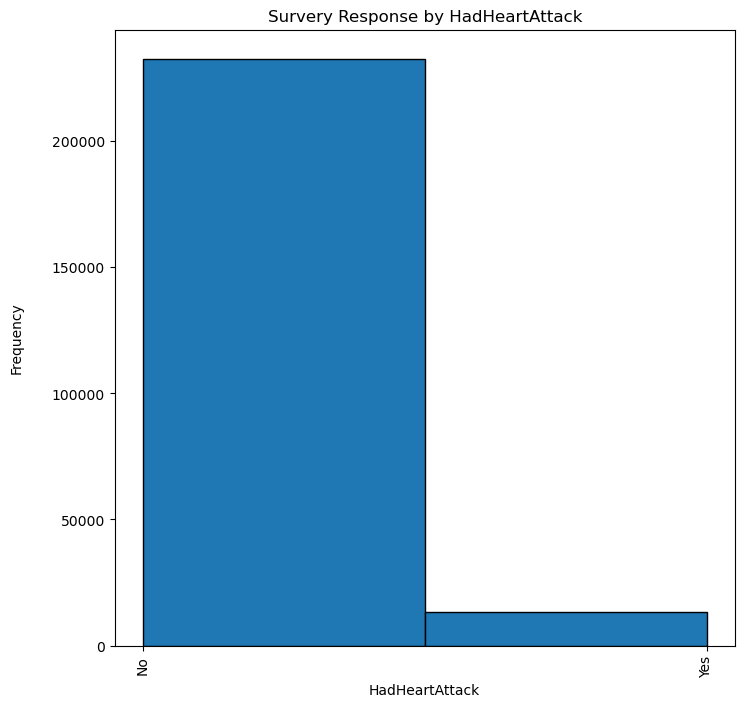

In [63]:
#Plotting a of each state for further analysis
plt.figure(figsize=(8, 8))
plt.hist((heart_attack_clean['HadHeartAttack']),edgecolor='black' ,bins=2)
plt.title('Survery Response by HadHeartAttack')
plt.ylabel('Frequency', labelpad=20)
plt.xlabel('HadHeartAttack')
plt.xticks(rotation=90)
plt.show()

**HadHeartAttack Comments**
- The Heart Attack Column has much more people that said no than yes.
- 94.54% of the Responses were no, 5.46% was yes

--

**State Analysis**

In [64]:
# Shows the distribution of each responses in the State Category
print(f"State Column General Statistics: \n{heart_attack_clean['State'].describe()}\n")
print(f"Number of Responses per each State:\n{heart_attack_clean['State'].value_counts()}")

State Column General Statistics: 
count         246022
unique            54
top       Washington
freq           15000
Name: State, dtype: object

Number of Responses per each State:
State
Washington              15000
Maryland                 9165
Minnesota                9161
Ohio                     8995
New York                 8923
Texas                    7408
Florida                  7315
Kansas                   6145
Wisconsin                6126
Maine                    6013
Iowa                     5672
Hawaii                   5596
Virginia                 5565
Indiana                  5502
South Carolina           5471
Massachusetts            5465
Arizona                  5462
Utah                     5373
Michigan                 5370
Colorado                 5159
Nebraska                 5107
California               5096
Connecticut              5053
Georgia                  4978
Vermont                  4845
South Dakota             4405
Montana                  4264
Mi

In [65]:
# Percentage of Responses per State
print(f"Percentage of Responses per {((heart_attack_raw['State'].value_counts() / (len(heart_attack_clean))) * 100).round(2)}")

Percentage of Responses per State
Washington              10.63
New York                 7.24
Minnesota                6.84
Ohio                     6.70
Maryland                 6.67
Texas                    5.79
Florida                  5.44
Wisconsin                4.58
Kansas                   4.57
Massachusetts            4.48
California               4.45
Maine                    4.33
Indiana                  4.25
Virginia                 4.23
Arizona                  4.14
Michigan                 4.09
South Carolina           4.08
Utah                     3.99
Connecticut              3.98
Colorado                 3.81
Georgia                  3.75
Iowa                     3.64
Vermont                  3.58
New Jersey               3.34
Hawaii                   3.15
Nebraska                 3.04
Missouri                 3.02
South Dakota             3.02
Montana                  2.86
New Hampshire            2.75
Idaho                    2.55
Rhode Island             2.40
Alaska

In [66]:
# The Top 5 and Bottom 5 Responses by State.
print(f"Top 5 Number of Responses per State:\n{heart_attack_clean['State'].value_counts().nlargest(n=5)}\n")
print(f"Bottom 5 Number of Responses per State:\n{heart_attack_clean['State'].value_counts().nsmallest(n=5).sort_values(ascending=False)}\n")

# Top and Bottom Responsive State
print(f"Most Responsive {heart_attack_clean['State'].value_counts().nlargest(n=1)}\n")
print(f"Least Responsive {heart_attack_clean['State'].value_counts().nsmallest(n=1)}\n")

Top 5 Number of Responses per State:
State
Washington    15000
Maryland       9165
Minnesota      9161
Ohio           8995
New York       8923
Name: count, dtype: int64

Bottom 5 Number of Responses per State:
State
Alabama                 1902
Nevada                  1769
District of Columbia    1725
Guam                    1549
Virgin Islands           743
Name: count, dtype: int64

Most Responsive State
Washington    15000
Name: count, dtype: int64

Least Responsive State
Virgin Islands    743
Name: count, dtype: int64



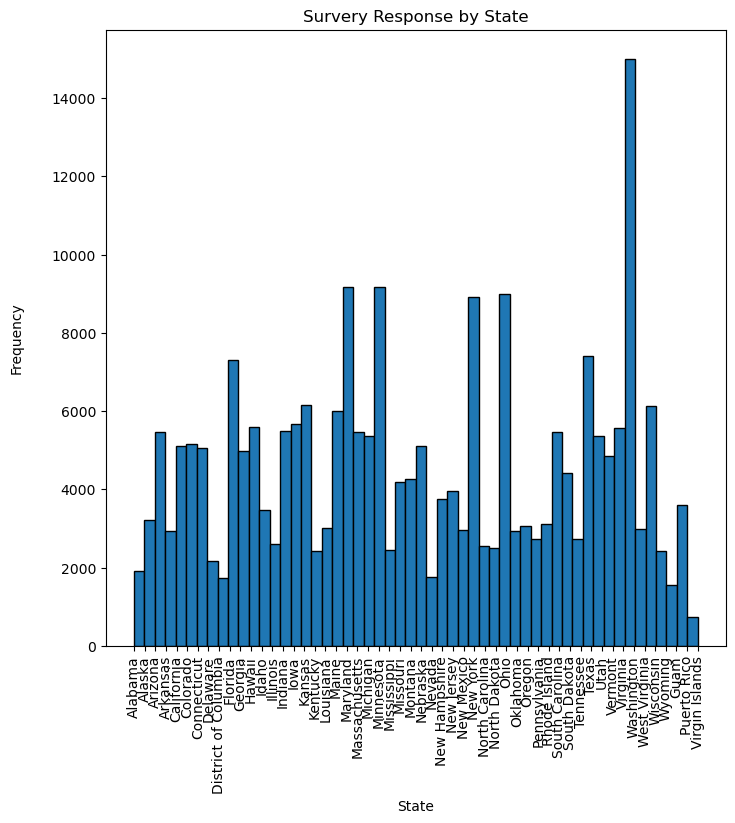

In [67]:
#Plotting a of each state for further analysis
plt.figure(figsize=(8, 8))
plt.hist((heart_attack_clean['State']),edgecolor='black' ,bins=54)
plt.title('Survery Response by State')
plt.ylabel('Frequency', labelpad=20)
plt.xlabel('State')
plt.xticks(rotation=90)
plt.show()

**State Column Comments**

- The data shows people in Washington were much more responsive than other states with 15000 responses, at 10.63% of all responses.

- The Virgin Islands had the lowest amount of responses with 734, 0.62% of all responses.

--

**LastCheckupTime Analysis**

In [68]:
# Shows the distribution of each responses in the LastCheckupTime Category
print(f"LastCheckupTime Column General Statistics: \n{heart_attack_clean['LastCheckupTime'].describe()}\n")
print(f"Number of Responses per each LastCheckupTime:\n{heart_attack_clean['LastCheckupTime'].value_counts()}")

LastCheckupTime Column General Statistics: 
count                                                246022
unique                                                    4
top       Within past year (anytime less than 12 months ...
freq                                                 198153
Name: LastCheckupTime, dtype: object

Number of Responses per each LastCheckupTime:
LastCheckupTime
Within past year (anytime less than 12 months ago)         198153
Within past 2 years (1 year but less than 2 years ago)      23227
Within past 5 years (2 years but less than 5 years ago)     13744
5 or more years ago                                         10898
Name: count, dtype: int64


In [69]:
# Percentage of Responses per LastCheckupTime
print(f"Percentage of Responses per {((heart_attack_clean['LastCheckupTime'].value_counts() / (len(heart_attack_clean))) * 100).round(2)}")

Percentage of Responses per LastCheckupTime
Within past year (anytime less than 12 months ago)         80.54
Within past 2 years (1 year but less than 2 years ago)      9.44
Within past 5 years (2 years but less than 5 years ago)     5.59
5 or more years ago                                         4.43
Name: count, dtype: float64


In [70]:
# The Top 5 and Bottom 5 Responses by LastCheckupTime.
print(f"Top 5 Number of Responses per LastCheckupTime:\n{heart_attack_clean['LastCheckupTime'].value_counts()}\n")

# Top and Bottom Responsive LastCheckupTime
print(f"Most Responsive {heart_attack_clean['LastCheckupTime'].value_counts().nlargest(n=1)}\n")
print(f"Least Responsive {heart_attack_clean['LastCheckupTime'].value_counts().nsmallest(n=1)}\n")

Top 5 Number of Responses per LastCheckupTime:
LastCheckupTime
Within past year (anytime less than 12 months ago)         198153
Within past 2 years (1 year but less than 2 years ago)      23227
Within past 5 years (2 years but less than 5 years ago)     13744
5 or more years ago                                         10898
Name: count, dtype: int64

Most Responsive LastCheckupTime
Within past year (anytime less than 12 months ago)    198153
Name: count, dtype: int64

Least Responsive LastCheckupTime
5 or more years ago    10898
Name: count, dtype: int64



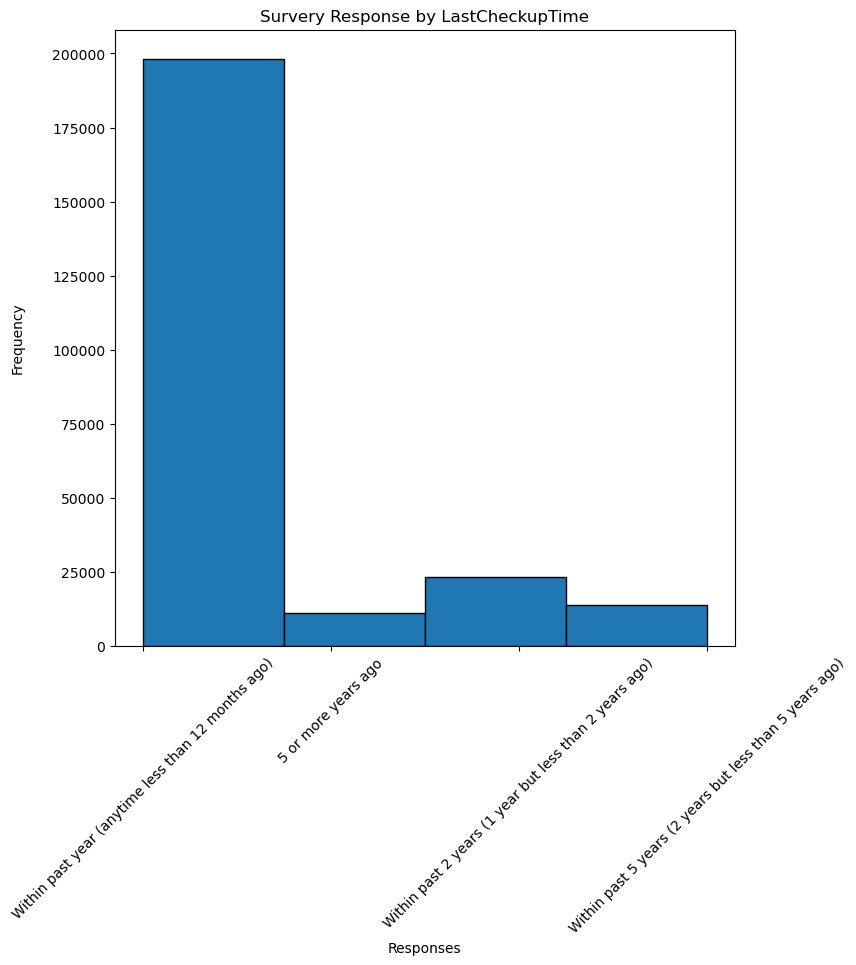

In [71]:
#Plotting a of each LastCheckupTime for further analysis
plt.figure(figsize=(8, 8))
plt.hist((heart_attack_clean['LastCheckupTime']).dropna(),edgecolor='black' ,bins=4)
plt.title('Survery Response by LastCheckupTime')
plt.ylabel('Frequency', labelpad=20)
plt.xlabel('Responses')
plt.xticks(rotation=45)
plt.show()

**LastCheckupTime Column Analysis**
- Within past year (anytime less than 12 months ago), being the answer given the most at 198153, thats 80.54% of the dataset.
- 5 or more years ago with 10898, thats 4.43% of the dataset.
- There is potential change the resonses in the database to witin 1 year and more than 1 year.

- As I am creating a model it will not work as the responsed can not understand words. The column will need to be changed via encoding for model interpretation.

--

**SleepHours Analysis**

In [79]:
# SleepHours Changed to its original datatype, to display more in depth stats
print(f"SleepHours Descriptive Stats:\n{heart_attack_clean['SleepHours'].astype(object).describe()}")

SleepHours Descriptive Stats:
count     246022.0
unique        23.0
top            7.0
freq       76447.0
Name: SleepHours, dtype: float64


In [76]:
# Shows the distribution of each responses in the SleepHours Category
print(f"SleepHours Column General Statistics: \n{heart_attack_clean['SleepHours'].describe()}\n")
print(f"Number of Responses per SleepHours:\n{heart_attack_clean['SleepHours'].value_counts()}")

SleepHours Column General Statistics: 
count    246022.000000
mean          7.021331
std           1.440681
min           1.000000
25%           6.000000
50%           7.000000
75%           8.000000
max          24.000000
Name: SleepHours, dtype: float64

Number of Responses per SleepHours:
SleepHours
7.0     76447
8.0     69927
6.0     53981
5.0     16417
9.0     11859
4.0      6478
10.0     5468
3.0      1618
12.0     1476
2.0       740
1.0       563
11.0      339
16.0      155
15.0      154
14.0      148
18.0       83
13.0       79
20.0       50
24.0       13
17.0       11
23.0        6
19.0        5
22.0        5
Name: count, dtype: int64


In [81]:
# Percentage of Responses per SleepHours
print(f"Percentage of Responses per {((heart_attack_raw['SleepHours'].value_counts() / (len(heart_attack_clean))) * 100).round(2)}")

Percentage of Responses per SleepHours
7.0     54.03
8.0     50.99
6.0     38.97
5.0     12.24
9.0      8.62
4.0      5.05
10.0     4.25
3.0      1.33
12.0     1.22
2.0      0.63
1.0      0.47
11.0     0.28
16.0     0.13
15.0     0.13
14.0     0.12
18.0     0.07
13.0     0.07
20.0     0.06
24.0     0.02
17.0     0.01
22.0     0.01
23.0     0.01
19.0     0.01
21.0     0.00
Name: count, dtype: float64


In [78]:
# The Top 5 and Bottom 5 Responses by SleepHours.
print(f"Top 5 Number of Responses per SleepHours:\n{heart_attack_clean['SleepHours'].value_counts().nlargest(n=5)}\n")
print(f"Bottom 5 Number of Responses per SleepHours:\n{heart_attack_clean['SleepHours'].value_counts().nsmallest(n=5).sort_values(ascending=False)}\n")

# Most and Least Responsive SleepHours
print(f"Most Responsive {heart_attack_clean['SleepHours'].value_counts().nlargest(n=1)}\n")
print(f"Least Responsive {heart_attack_clean['SleepHours'].value_counts().nsmallest(n=1)}\n")

Top 5 Number of Responses per SleepHours:
SleepHours
7.0    76447
8.0    69927
6.0    53981
5.0    16417
9.0    11859
Name: count, dtype: int64

Bottom 5 Number of Responses per SleepHours:
SleepHours
24.0    13
17.0    11
23.0     6
19.0     5
22.0     5
Name: count, dtype: int64

Most Responsive SleepHours
7.0    76447
Name: count, dtype: int64

Least Responsive SleepHours
19.0    5
Name: count, dtype: int64



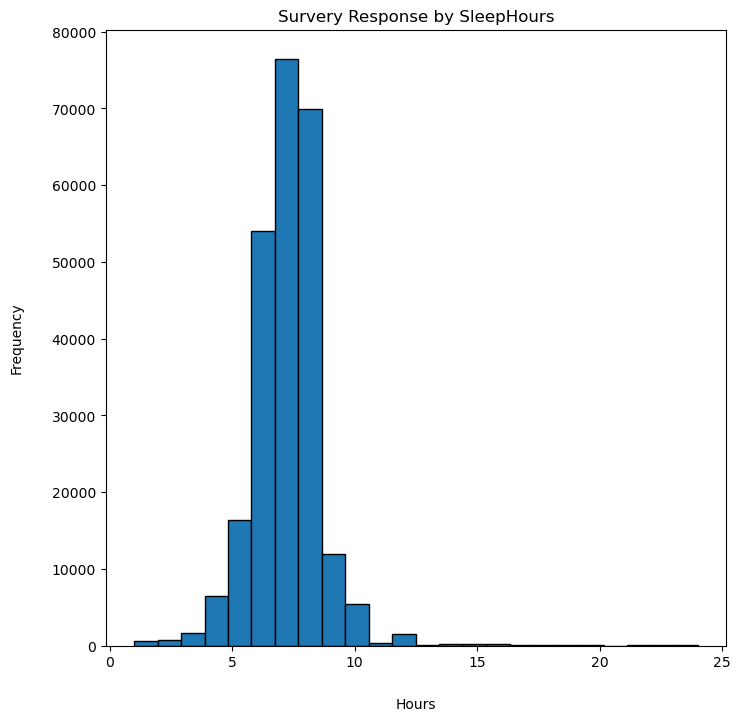

In [80]:
#Plotting a of each SleepHours for further analysis
plt.figure(figsize=(8, 8))
plt.hist((heart_attack_clean['SleepHours']).dropna(),edgecolor='black' ,bins=24)
plt.title('Survery Response by SleepHours')
plt.ylabel('Frequency', labelpad=20)
plt.xlabel('Hours', labelpad=20)
plt.show()

**SleepHours Comments**

There was a gap made for 'SleepHours' in the 40 histogram plots, due to the number of bins needed to represent the 'State' column effectivley. There were too many and made a gap in the middle of the plot.

- Most people get 7 hours of sleep, with 76447 people getting 7 hours, thats 54.03% of the dataset.
- There are a few people that say they sleep for more than 12 hours a day. This constitutes to oversleeping and narcolepsy. Past 9 hours of sleep reguarly is a known key indicators of heart disease.

--

**RemovedTeeth Analysis**

In [ ]:
# Shows the distribution of each responses in the RemovedTeeth Category
print(f"RemovedTeeth Column General Statistics: \n{heart_attack_clean['RemovedTeeth'].describe()}\n")
print(f"Number of Responses per each RemovedTeeth:\n{heart_attack_clean['RemovedTeeth'].value_counts()}")

In [ ]:
# Percentage of Responses per RemovedTeeth
print(f"Percentage of Responses per {((heart_attack_raw['RemovedTeeth'].value_counts() / (len(heart_attack_clean))) * 100).round(4)}")
# The Top 5 and Bottom 5 Responses by RemovedTeeth.
print(f"Number of Responses per RemovedTeeth:\n{heart_attack_clean['RemovedTeeth'].value_counts().nlargest(n=5)}\n")

In [ ]:
# Top and Bottom Responsive RemovedTeeth
print(f"Most Responsive {heart_attack_clean['RemovedTeeth'].value_counts().nlargest(n=1)}\n")
print(f"Least Responsive {heart_attack_clean['RemovedTeeth'].value_counts().nsmallest(n=1)}\n")

In [ ]:
#Plotting a of each RemovedTeeth for further analysis
plt.figure(figsize=(8, 8))
plt.hist((heart_attack_clean['RemovedTeeth']).dropna(),edgecolor='black' ,bins=4)
plt.title('Survery Response by RemovedTeeth')
plt.ylabel('Frequency', labelpad=20)
plt.xlabel('Number of Teeth Removed', labelpad=20)
plt.show()

**RemovedTeeth Column Comments**

For a clearer picture of each category none can be combined as it may skew the data.

- Good distribution of answers in relation to how many people actually have none of their teeth removed to someone that has 1 or more teeth removed.

- As I am creating a model it will not work as the responsed can not understand words. The column will need to be changed via encoding for model interpretation.

--

**HadDiabetes Column Analysis**

In [82]:
# Shows the distribution of each responses in the HadDiabetes Category
print(f"HadDiabetes Column General Statistics: \n{heart_attack_clean['HadDiabetes'].describe()}\n")
print(f"Number of Responses for HadDiabetes:\n{heart_attack_clean['HadDiabetes'].value_counts()}")

HadDiabetes Column General Statistics: 
count     246022
unique         4
top           No
freq      204834
Name: HadDiabetes, dtype: object

Number of Responses for HadDiabetes:
HadDiabetes
No                                         204834
Yes                                         33813
No, pre-diabetes or borderline diabetes      5392
Yes, but only during pregnancy (female)      1983
Name: count, dtype: int64


In [83]:
# Percentage of Responses per HadDiabetes
print(f"Percentage of Responses per {((heart_attack_clean['HadDiabetes'].value_counts() / (len(heart_attack_clean))) * 100).round(4)}")


Percentage of Responses per HadDiabetes
No                                         83.2584
Yes                                        13.7439
No, pre-diabetes or borderline diabetes     2.1917
Yes, but only during pregnancy (female)     0.8060
Name: count, dtype: float64


In [85]:
# The Top 5 and Bottom 5 Responses by HadDiabetes.
print(f"Top 5 Number of Responses per HadDiabetes:\n{heart_attack_clean['HadDiabetes'].value_counts()}\n")

# Top and Bottom Responsive HadDiabetes
print(f"Most Responsive {heart_attack_clean['HadDiabetes'].value_counts().nlargest(n=1)}\n")
print(f"Least Responsive {heart_attack_clean['HadDiabetes'].value_counts().nsmallest(n=1)}\n")

Top 5 Number of Responses per HadDiabetes:
HadDiabetes
No                                         204834
Yes                                         33813
No, pre-diabetes or borderline diabetes      5392
Yes, but only during pregnancy (female)      1983
Name: count, dtype: int64

Most Responsive HadDiabetes
No    204834
Name: count, dtype: int64

Least Responsive HadDiabetes
Yes, but only during pregnancy (female)    1983
Name: count, dtype: int64



In [86]:
#Highlighting Outlier Responses
print(f"HadDiabetes Responses by Gender ('Sex'):\n{heart_attack_clean.groupby(['HadDiabetes','Sex']).size()}\n")
print(f"Outlier Response - Yes, but only during pregnancy (female):\n{heart_attack_clean.groupby(['HadDiabetes','Sex']).size()[7]}\n\
Male response to a female only response")


HadDiabetes Responses by Gender ('Sex'):
HadDiabetes                              Sex   
No                                       Female    106480
                                         Male       98354
No, pre-diabetes or borderline diabetes  Female      2942
                                         Male        2450
Yes                                      Female     16415
                                         Male       17398
Yes, but only during pregnancy (female)  Female      1974
                                         Male           9
dtype: int64

Outlier Response - Yes, but only during pregnancy (female):
9
Male response to a female only response


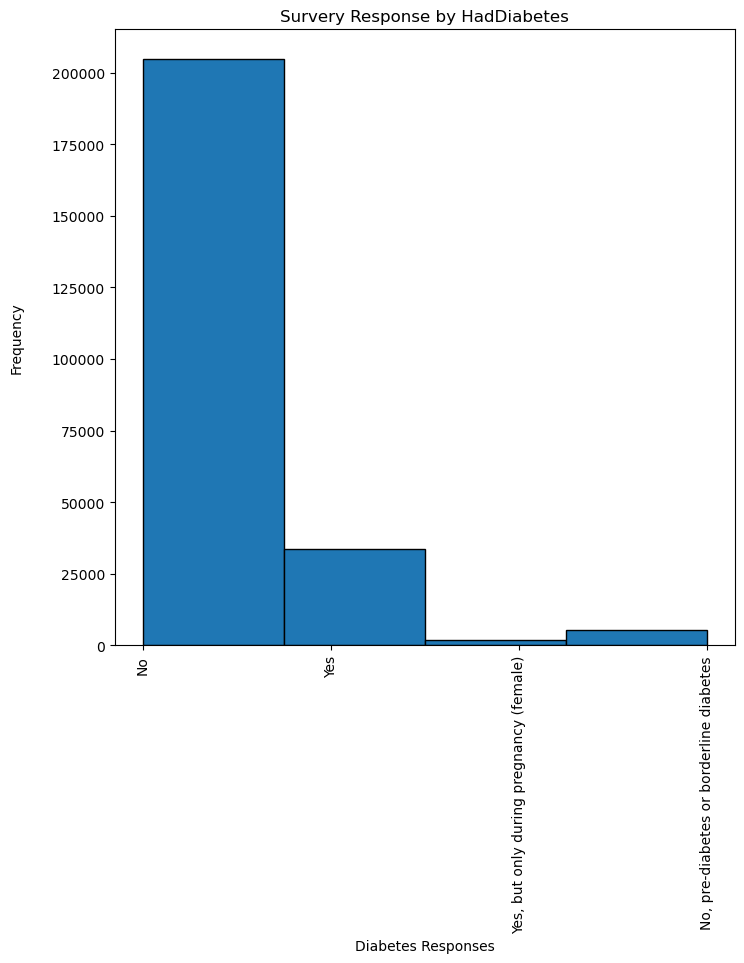

In [87]:
#Plotting a of each HadDiabetes for further analysis
plt.figure(figsize=(8, 8))
plt.hist((heart_attack_clean['HadDiabetes']).dropna(),edgecolor='black' ,bins=4)
plt.title('Survery Response by HadDiabetes')
plt.ylabel('Frequency', labelpad=20)
plt.xlabel('Diabetes Responses')
plt.xticks(rotation=90)
plt.show()

**HadDiabetes Column Comments**

- Yes, but only during pregnancy (female), has 9 male responses. They either need to be rectified or deleted if the other responses are too ambiguous.

--

**SmokerStatus Column Analysis**

In [88]:
# Shows the distribution of each responses in the SmokerStatus Category
print(f"SmokerStatus Column General Statistics: \n{heart_attack_clean['SmokerStatus'].describe()}\n")
print(f"Number of Responses per each SmokerStatus:\n{heart_attack_clean['SmokerStatus'].value_counts()}")

SmokerStatus Column General Statistics: 
count           246022
unique               4
top       Never smoked
freq            147737
Name: SmokerStatus, dtype: object

Number of Responses per each SmokerStatus:
SmokerStatus
Never smoked                             147737
Former smoker                             68527
Current smoker - now smokes every day     21659
Current smoker - now smokes some days      8099
Name: count, dtype: int64


In [89]:
# Percentage of Responses per SmokerStatus
print(f"Percentage of Responses per {((heart_attack_clean['SmokerStatus'].value_counts() / (len(heart_attack_clean))) * 100).round(4)}")

Percentage of Responses per SmokerStatus
Never smoked                             60.0503
Former smoker                            27.8540
Current smoker - now smokes every day     8.8037
Current smoker - now smokes some days     3.2920
Name: count, dtype: float64


In [90]:
# The Top 5 and Bottom 5 Responses by SmokerStatus.
print(f"Top 5 Number of Responses per SmokerStatus:\n{heart_attack_clean['SmokerStatus'].value_counts()}\n")

# Top and Bottom Responsive SmokerStatus
print(f"Most Responsive {heart_attack_clean['SmokerStatus'].value_counts().nlargest(n=1)}\n")
print(f"Least Responsive {heart_attack_clean['SmokerStatus'].value_counts().nsmallest(n=1)}\n")

Top 5 Number of Responses per SmokerStatus:
SmokerStatus
Never smoked                             147737
Former smoker                             68527
Current smoker - now smokes every day     21659
Current smoker - now smokes some days      8099
Name: count, dtype: int64

Most Responsive SmokerStatus
Never smoked    147737
Name: count, dtype: int64

Least Responsive SmokerStatus
Current smoker - now smokes some days    8099
Name: count, dtype: int64



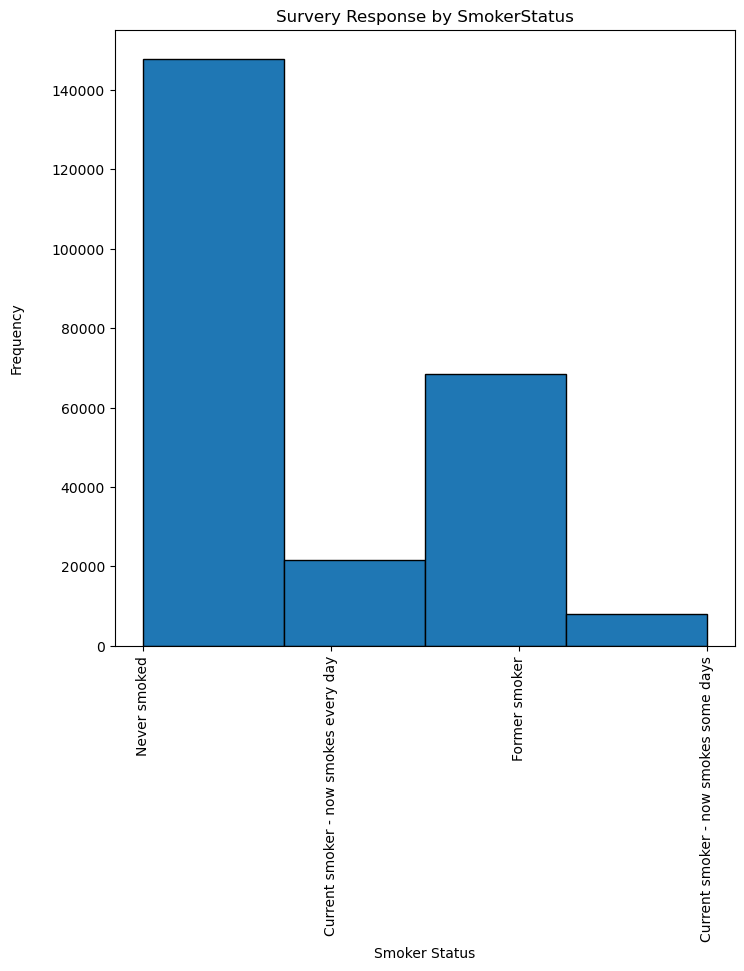

In [91]:
#Plotting a of each SmokerStatus for further analysis
plt.figure(figsize=(8, 8))
plt.hist((heart_attack_clean['SmokerStatus']).sort_index(ascending=False).dropna(),edgecolor='black' ,bins=4)
plt.title('Survery Response by SmokerStatus')
plt.ylabel('Frequency', labelpad=20)
plt.xlabel('Smoker Status')
plt.xticks(rotation=90)
plt.show()

**SmokerStatus Column Comments**

- Formar Smoker, Current smoker - now smokes every day annd Current smoker now smokes some days, may be able to be renamed as HasSmoked.

- After the columns have been renamed they will need to be preprocessed for model interpretation. Since there will only be 2 responses it can be binary encoded for, Has Smoked? yes or no.

--

**ECigaretteUsage Column Analysis**

In [93]:
# Shows the distribution of each responses in the ECigaretteUsage Category
print(f"ECigaretteUsage Column General Statistics: \n{heart_attack_clean['ECigaretteUsage'].describe()}\n")
print(f"Number of Responses per each ECigaretteUsage:\n{heart_attack_clean['ECigaretteUsage'].value_counts()}")

ECigaretteUsage Column General Statistics: 
count                                        246022
unique                                            4
top       Never used e-cigarettes in my entire life
freq                                         190128
Name: ECigaretteUsage, dtype: object

Number of Responses per each ECigaretteUsage:
ECigaretteUsage
Never used e-cigarettes in my entire life    190128
Not at all (right now)                        43281
Use them some days                             6658
Use them every day                             5955
Name: count, dtype: int64


In [97]:
# Percentage of Responses per ECigaretteUsage
print(f"Percentage of Responses per: {((heart_attack_clean['ECigaretteUsage'].value_counts() / (len(heart_attack_clean))) * 100).round(4)}")

Percentage of Responses per: ECigaretteUsage
Never used e-cigarettes in my entire life    77.2809
Not at all (right now)                       17.5923
Use them some days                            2.7063
Use them every day                            2.4205
Name: count, dtype: float64


In [95]:
# The Top 5 and Bottom 5 Responses by ECigaretteUsage.
print(f"Top 5 Number of Responses per ECigaretteUsage:\n{heart_attack_clean['ECigaretteUsage'].value_counts()}\n")

# Top and Bottom Responsive ECigaretteUsage
print(f"Most Responsive {heart_attack_clean['ECigaretteUsage'].value_counts().nlargest(n=1)}\n")
print(f"Least Responsive {heart_attack_clean['ECigaretteUsage'].value_counts().nsmallest(n=1)}\n")

Top 5 Number of Responses per ECigaretteUsage:
ECigaretteUsage
Never used e-cigarettes in my entire life    190128
Not at all (right now)                        43281
Use them some days                             6658
Use them every day                             5955
Name: count, dtype: int64

Most Responsive ECigaretteUsage
Never used e-cigarettes in my entire life    190128
Name: count, dtype: int64

Least Responsive ECigaretteUsage
Use them every day    5955
Name: count, dtype: int64



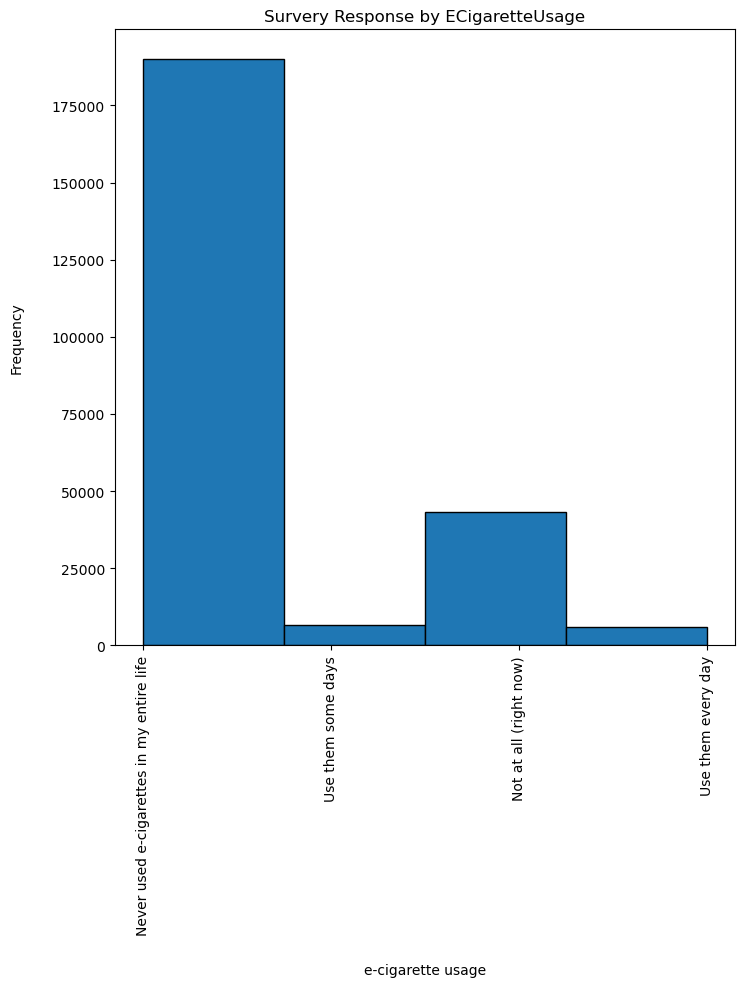

In [98]:
#Plotting a of each ECigaretteUsage for further analysis
plt.figure(figsize=(8, 8))
plt.hist((heart_attack_clean['ECigaretteUsage']).dropna(),edgecolor='black' ,bins=4)
plt.title('Survery Response by ECigaretteUsage')
plt.ylabel('Frequency', labelpad=20)
plt.xlabel('e-cigarette usage', labelpad=20)
plt.xticks(rotation=90)
plt.show()

**ECigarretteUsage Column Comments**

- Not at all (right now) is an open ended and ambiguous response. Looking at the smoker status analysis this could also mean they are a former e-cigarette user.
- Use them some days and Use them every day, can be combined and name changed to Current e-cigarette user.

--

**RaceEthnicCategory Column Analysis**

In [99]:
# Shows the distribution of each responses in the RaceEthnicityCategory Category
print(f"RaceEthnicityCategory Column General Statistics: \n{heart_attack_clean['RaceEthnicityCategory'].describe()}\n")
print(f"Number of Responses per each RaceEthnicityCategory:\n{heart_attack_clean['RaceEthnicityCategory'].value_counts()}")

RaceEthnicityCategory Column General Statistics: 
count                       246022
unique                           5
top       White only, Non-Hispanic
freq                        186336
Name: RaceEthnicityCategory, dtype: object

Number of Responses per each RaceEthnicityCategory:
RaceEthnicityCategory
White only, Non-Hispanic         186336
Hispanic                          22570
Black only, Non-Hispanic          19330
Other race only, Non-Hispanic     12205
Multiracial, Non-Hispanic          5581
Name: count, dtype: int64


In [106]:
# Percentage of Responses per RaceEthnicityCategory
print(f"Percentage of Responses per: {((heart_attack_clean['RaceEthnicityCategory'].value_counts() / (len(heart_attack_clean))) * 100).round(2)}\n")

# Top and Bottom Responsive RaceEthnicityCategory
print(f"Most Responsive {heart_attack_clean['RaceEthnicityCategory'].value_counts().nlargest(n=1)}\n")
print(f"Least Responsive {heart_attack_clean['RaceEthnicityCategory'].value_counts().nsmallest(n=1)}\n")

Percentage of Responses per: RaceEthnicityCategory
White only, Non-Hispanic         75.74
Hispanic                          9.17
Black only, Non-Hispanic          7.86
Other race only, Non-Hispanic     4.96
Multiracial, Non-Hispanic         2.27
Name: count, dtype: float64

Most Responsive RaceEthnicityCategory
White only, Non-Hispanic    186336
Name: count, dtype: int64

Least Responsive RaceEthnicityCategory
Multiracial, Non-Hispanic    5581
Name: count, dtype: int64



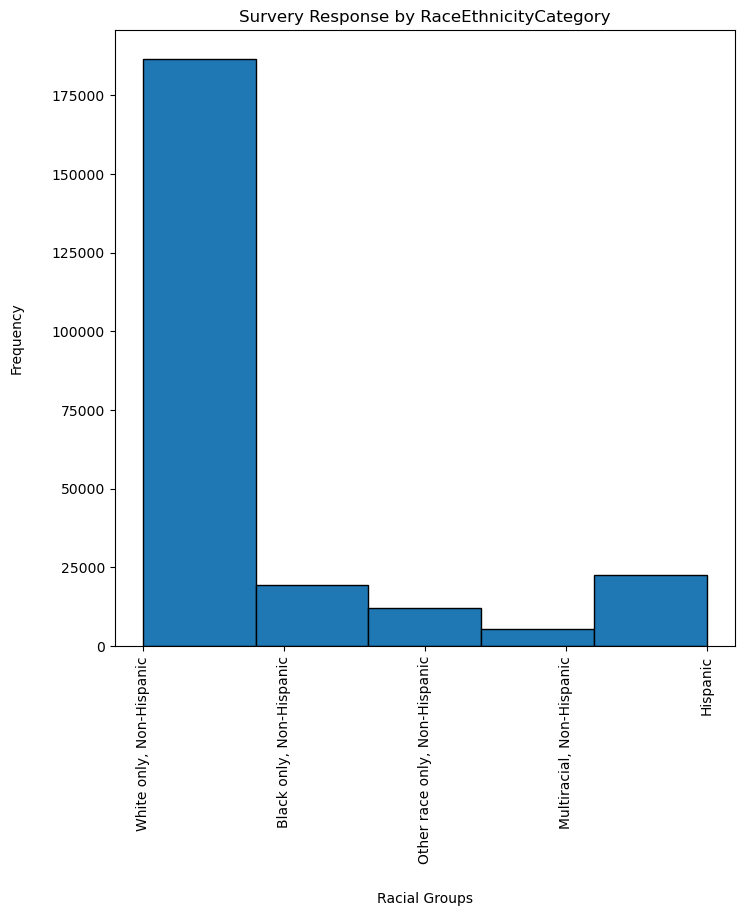

In [101]:
#Plotting a of each RaceEthnicityCategory for further analysis
plt.figure(figsize=(8, 8))
plt.hist((heart_attack_clean['RaceEthnicityCategory']).dropna(),edgecolor='black' ,bins=5)
plt.title('Survery Response by RaceEthnicityCategory')
plt.ylabel('Frequency', labelpad=20)
plt.xlabel('Racial Groups', labelpad=20)
plt.xticks(rotation=90)
plt.show()

**RaceEthnicityCategory Column Comments**

- There is a massive data imbalance. White only, Non-Hispanic takes up 75.74% of the database at 186336 responses. With the next nearest racial group being Hispanic at 22570 responses, 9.17% of the dataset.

- This column may be a candidate to be dropped. As the interpretation would be skewed towards defining and interpreting white people more than other races, when i want the model to define characteristics of a heart attack equally throughout all races.

--

**AgeCategory Column Analysis**

In [107]:
# Shows the distribution of each responses in the AgeCategory Category
print(f"AgeCategory Column General Statistics: \n{heart_attack_clean['AgeCategory'].describe()}\n")
print(f"Number of Responses per each AgeCategory:\n{heart_attack_clean['AgeCategory'].value_counts()}")

AgeCategory Column General Statistics: 
count           246022
unique              13
top       Age 65 to 69
freq             28557
Name: AgeCategory, dtype: object

Number of Responses per each AgeCategory:
AgeCategory
Age 65 to 69       28557
Age 60 to 64       26720
Age 70 to 74       25739
Age 55 to 59       22224
Age 50 to 54       19913
Age 75 to 79       18136
Age 80 or older    17816
Age 40 to 44       16973
Age 45 to 49       16753
Age 35 to 39       15614
Age 30 to 34       13346
Age 18 to 24       13122
Age 25 to 29       11109
Name: count, dtype: int64


In [108]:
# Percentage of Responses per AgeCategory
print(f"Percentage of Responses per {((heart_attack_clean['AgeCategory'].value_counts() / (len(heart_attack_clean))) * 100).round(2)}")

Percentage of Responses per AgeCategory
Age 65 to 69       11.61
Age 60 to 64       10.86
Age 70 to 74       10.46
Age 55 to 59        9.03
Age 50 to 54        8.09
Age 75 to 79        7.37
Age 80 or older     7.24
Age 40 to 44        6.90
Age 45 to 49        6.81
Age 35 to 39        6.35
Age 30 to 34        5.42
Age 18 to 24        5.33
Age 25 to 29        4.52
Name: count, dtype: float64


In [109]:
# The Top 5 and Bottom 5 Responses by AgeCategory.
print(f"Top 5 Number of Responses per AgeCategory:\n{heart_attack_clean['AgeCategory'].value_counts().nlargest(n=5)}\n")
print(f"Bottom 5 Number of Responses per AgeCategory:\n{heart_attack_clean['AgeCategory'].value_counts().nsmallest(n=5).sort_values(ascending=False)}\n")

# Top and Bottom Responsive AgeCategory
print(f"Most Responsive {heart_attack_clean['AgeCategory'].value_counts().nlargest(n=1)}\n")
print(f"Least Responsive {heart_attack_clean['AgeCategory'].value_counts().nsmallest(n=1)}\n")

Top 5 Number of Responses per AgeCategory:
AgeCategory
Age 65 to 69    28557
Age 60 to 64    26720
Age 70 to 74    25739
Age 55 to 59    22224
Age 50 to 54    19913
Name: count, dtype: int64

Bottom 5 Number of Responses per AgeCategory:
AgeCategory
Age 45 to 49    16753
Age 35 to 39    15614
Age 30 to 34    13346
Age 18 to 24    13122
Age 25 to 29    11109
Name: count, dtype: int64

Most Responsive AgeCategory
Age 65 to 69    28557
Name: count, dtype: int64

Least Responsive AgeCategory
Age 25 to 29    11109
Name: count, dtype: int64



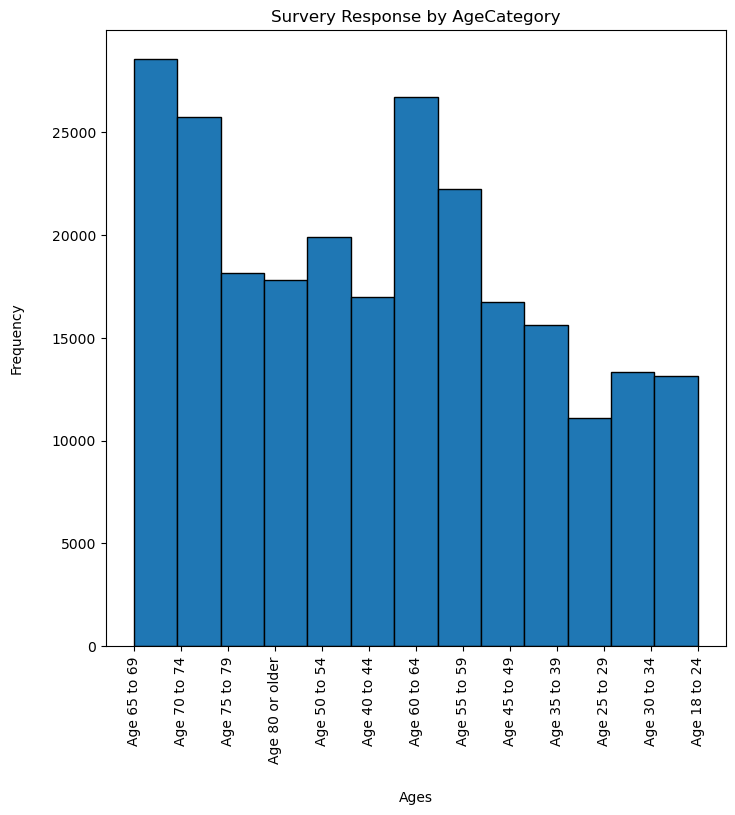

In [110]:
#Plotting a of each AgeCategory for further analysis
plt.figure(figsize=(8, 8))
plt.hist((heart_attack_clean['AgeCategory']).dropna(),edgecolor='black' ,bins=13)
plt.title('Survery Response by AgeCategory')
plt.ylabel('Frequency', labelpad=20)
plt.xlabel('Ages', labelpad=20)
plt.xticks(rotation=90)
plt.show()

**AgeCategory Column Comments**

- Responses seem to be good and well distributed along all bins of ages.

- I may be able to condense ages together to prepare for encoding. The ages currently go up in fives (5) until the response, 80 or older. They could go up in tens (10) which would 

- As the column infers age as a ever increasing factor. it would be a good candidate for ordinal encoding. This technique would be used as age is a known factor for increasing probability of heart disease.

--

**TetanusLast10Tdap Column Analysis**

In [111]:
# Shows the distribution of each responses in the TetanusLast10Tdap Category
print(f"TetanusLast10Tdap Column General Statistics: \n{heart_attack_clean['TetanusLast10Tdap'].describe()}\n")
print(f"Number of Responses per each TetanusLast10Tdap:\n{heart_attack_clean['TetanusLast10Tdap'].value_counts()}")

TetanusLast10Tdap Column General Statistics: 
count                                                246022
unique                                                    4
top       No, did not receive any tetanus shot in the pa...
freq                                                  81747
Name: TetanusLast10Tdap, dtype: object

Number of Responses per each TetanusLast10Tdap:
TetanusLast10Tdap
No, did not receive any tetanus shot in the past 10 years    81747
Yes, received tetanus shot but not sure what type            74119
Yes, received Tdap                                           70286
Yes, received tetanus shot, but not Tdap                     19870
Name: count, dtype: int64


In [113]:
# Percentage of Responses per TetanusLast10Tdap
print(f"Percentage of Responses per {((heart_attack_clean['TetanusLast10Tdap'].value_counts() / (len(heart_attack_clean))) * 100).round(2)}")

Percentage of Responses per TetanusLast10Tdap
No, did not receive any tetanus shot in the past 10 years    33.23
Yes, received tetanus shot but not sure what type            30.13
Yes, received Tdap                                           28.57
Yes, received tetanus shot, but not Tdap                      8.08
Name: count, dtype: float64


In [114]:
# The Top 5 and Bottom 5 Responses by TetanusLast10Tdap.
print(f"Number of Responses per TetanusLast10Tdap:\n{heart_attack_clean['TetanusLast10Tdap'].value_counts()}\n")

# Top and Bottom Responsive TetanusLast10Tdap
print(f"Most Responsive {heart_attack_clean['TetanusLast10Tdap'].value_counts().nlargest(n=1)}\n")
print(f"Least Responsive {heart_attack_clean['TetanusLast10Tdap'].value_counts().nsmallest(n=1)}\n")

Number of Responses per TetanusLast10Tdap:
TetanusLast10Tdap
No, did not receive any tetanus shot in the past 10 years    81747
Yes, received tetanus shot but not sure what type            74119
Yes, received Tdap                                           70286
Yes, received tetanus shot, but not Tdap                     19870
Name: count, dtype: int64

Most Responsive TetanusLast10Tdap
No, did not receive any tetanus shot in the past 10 years    81747
Name: count, dtype: int64

Least Responsive TetanusLast10Tdap
Yes, received tetanus shot, but not Tdap    19870
Name: count, dtype: int64



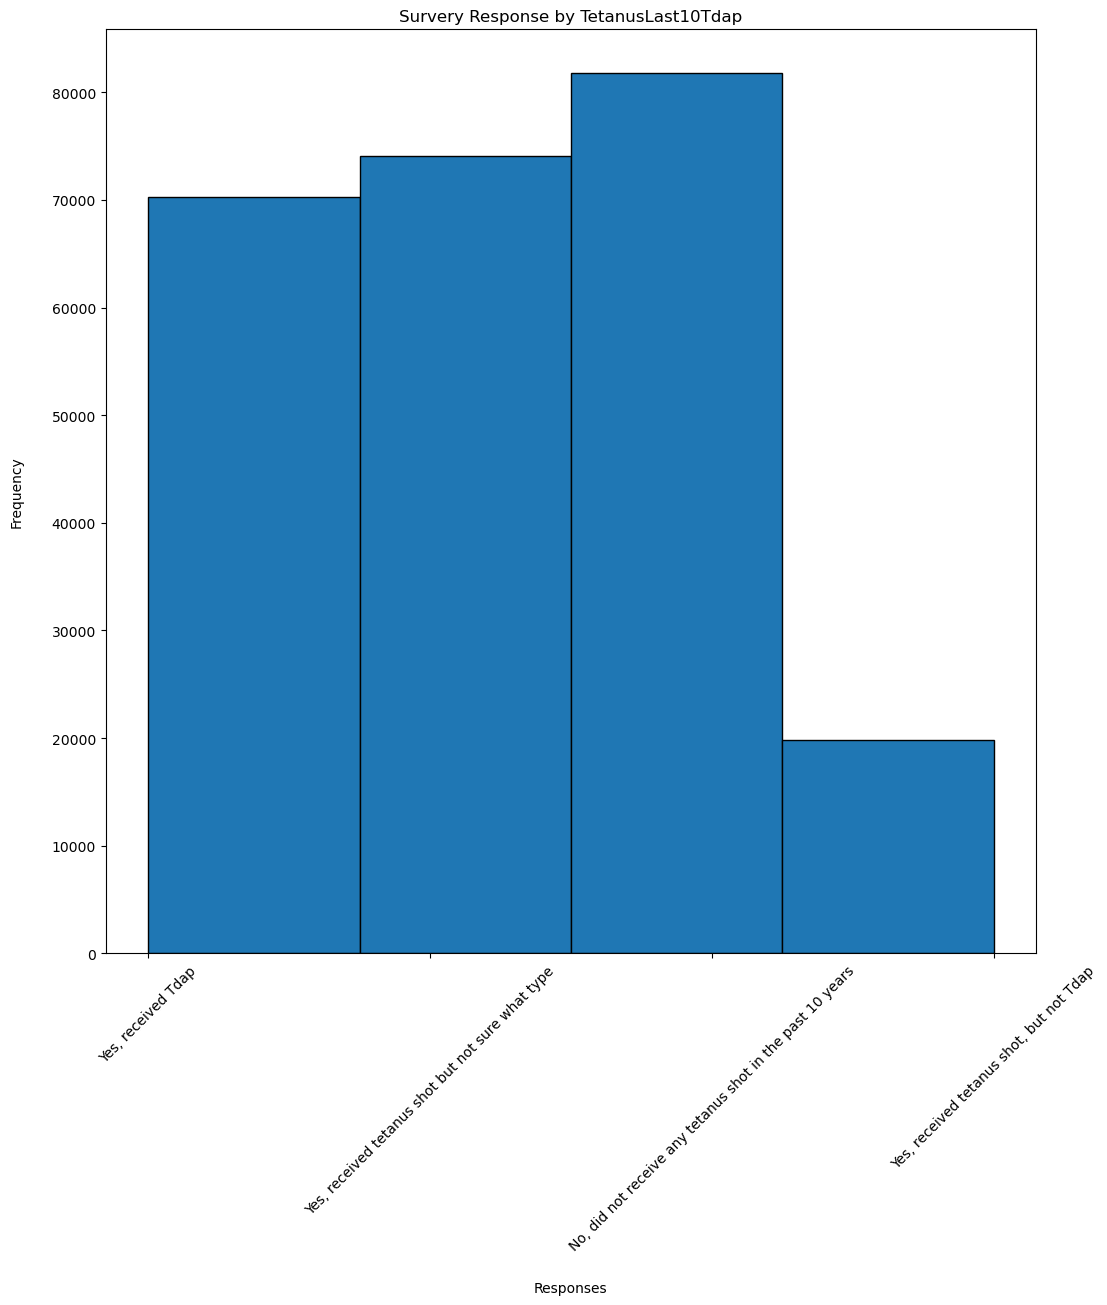

In [117]:
#Plotting a of each TetanusLast10Tdap for further analysis
plt.figure(figsize=(12, 12))
plt.hist((heart_attack_clean['TetanusLast10Tdap']).dropna(),edgecolor='black' ,bins=4)
plt.title('Survery Response by TetanusLast10Tdap')
plt.ylabel('Frequency', labelpad=20)
plt.xlabel('Responses', labelpad=20)
plt.xticks(rotation=45)
plt.show()

**TetanusLast10Tdap Column Comments**

- Responses seem to be good and well distributed along all TetanusLast10Tdap responses, except "Yes, received tetanus shot, but not Tdap" at 19870 compared to the next nearest result.

- The responses in this column can be combined into yes and no answers and binary encoded to represent both options as a numerical value.

--

**CovidPos Column Analysis**

In [118]:
# Shows the distribution of each responses in the CovidPos Category
print(f"CovidPos Column General Statistics: \n{heart_attack_clean['CovidPos'].describe()}\n")
print(f"Number of Responses per each CovidPos:\n{heart_attack_clean['CovidPos'].value_counts()}")

CovidPos Column General Statistics: 
count     246022
unique         3
top           No
freq      167306
Name: CovidPos, dtype: object

Number of Responses per each CovidPos:
CovidPos
No                                                               167306
Yes                                                               70324
Tested positive using home test without a health professional      8392
Name: count, dtype: int64


In [119]:
# Percentage of Responses per CovidPos
print(f"Percentage of Responses per {((heart_attack_clean['CovidPos'].value_counts() / (len(heart_attack_clean))) * 100).round(4)}")

Percentage of Responses per CovidPos
No                                                               68.0045
Yes                                                              28.5844
Tested positive using home test without a health professional     3.4111
Name: count, dtype: float64


In [125]:
# The Top and Bottom Responses by CovidPos.
print(f"Number of Responses per CovidPos:\n{heart_attack_clean['CovidPos'].value_counts().nlargest(n=5)}\n")

# Top and Bottom Responsive CovidPos
print(f"Most Responsive {heart_attack_clean['CovidPos'].value_counts().nlargest(n=1)}\n")
print(f"Least Responsive {heart_attack_clean['CovidPos'].value_counts().nsmallest(n=1)}\n")

Number of Responses per CovidPos:
CovidPos
No                                                               167306
Yes                                                               70324
Tested positive using home test without a health professional      8392
Name: count, dtype: int64

Most Responsive CovidPos
No    167306
Name: count, dtype: int64

Least Responsive CovidPos
Tested positive using home test without a health professional    8392
Name: count, dtype: int64



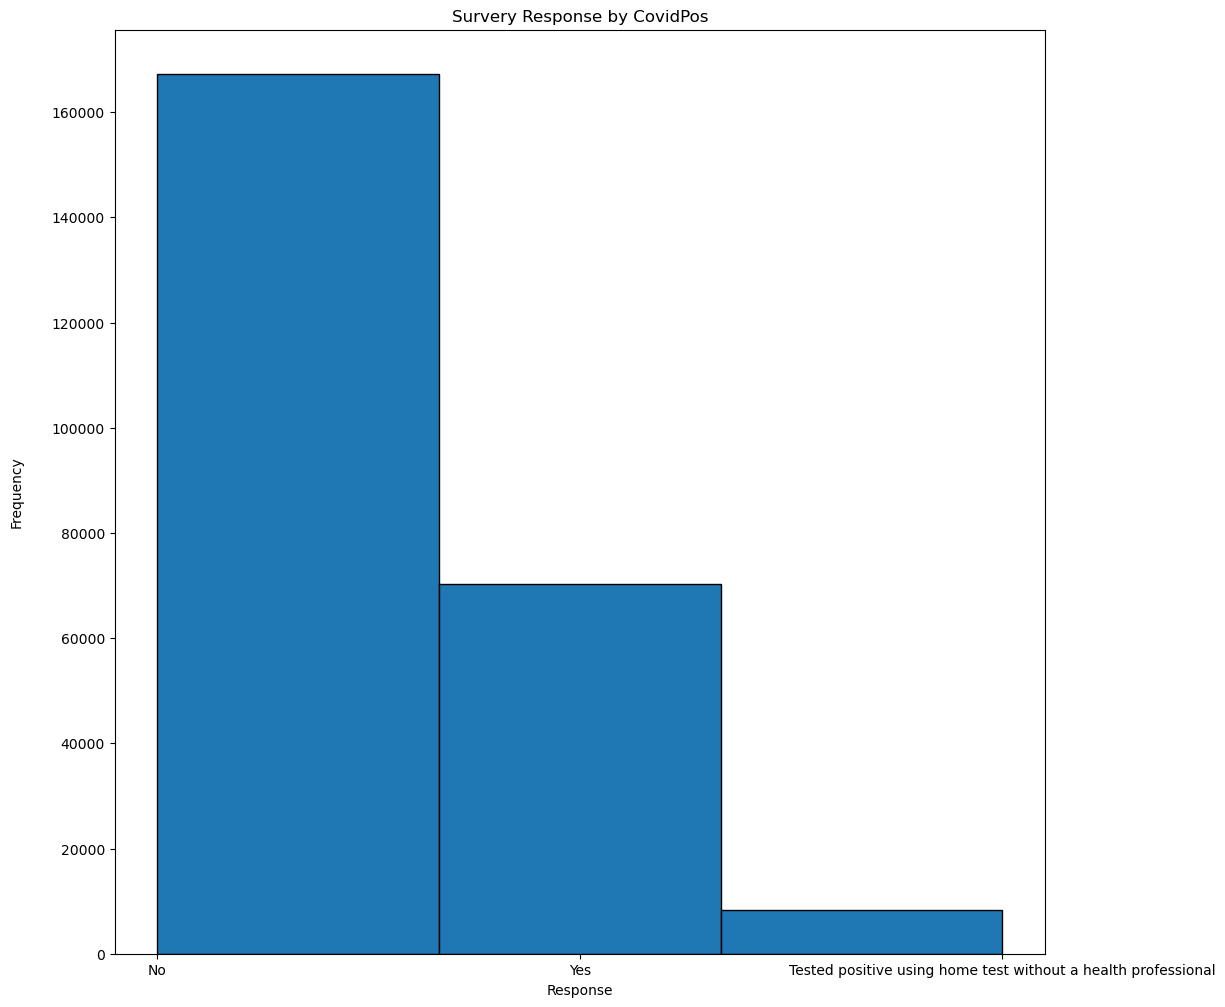

In [126]:
#Plotting a of each CovidPos for further analysis
plt.figure(figsize=(12, 12))
plt.hist((heart_attack_clean['CovidPos']).dropna(),edgecolor='black' ,bins=3)
plt.title('Survery Response by CovidPos')
plt.ylabel('Frequency', labelpad=20)
plt.xlabel('Response')
plt.show()

**CovidPos Column Comments**

- Yes and Tested positive using home test without a health professional, may be able to be combined as both state the individuals were covid positive.

- The column is a candidate for binary encoding as when the renaming process happens there will only be yes and no answers.

- Is this a column candidate for dropping? No, covid19 is a deasease that had a great amount of variation in patients. 

--

Changing the changed columns datatypes back to their originals

In [127]:
heart_attack_clean = heart_attack_clean.astype({"PhysicalHealthDays": float,
                                                                "MentalHealthDays": float,
                                                                "SleepHours": float, 
                                                                "HeightInMeters": float,
                                                                "WeightInKilograms": float, 
                                                                "BMI": float})

Boxplot Numerical Column Analysis


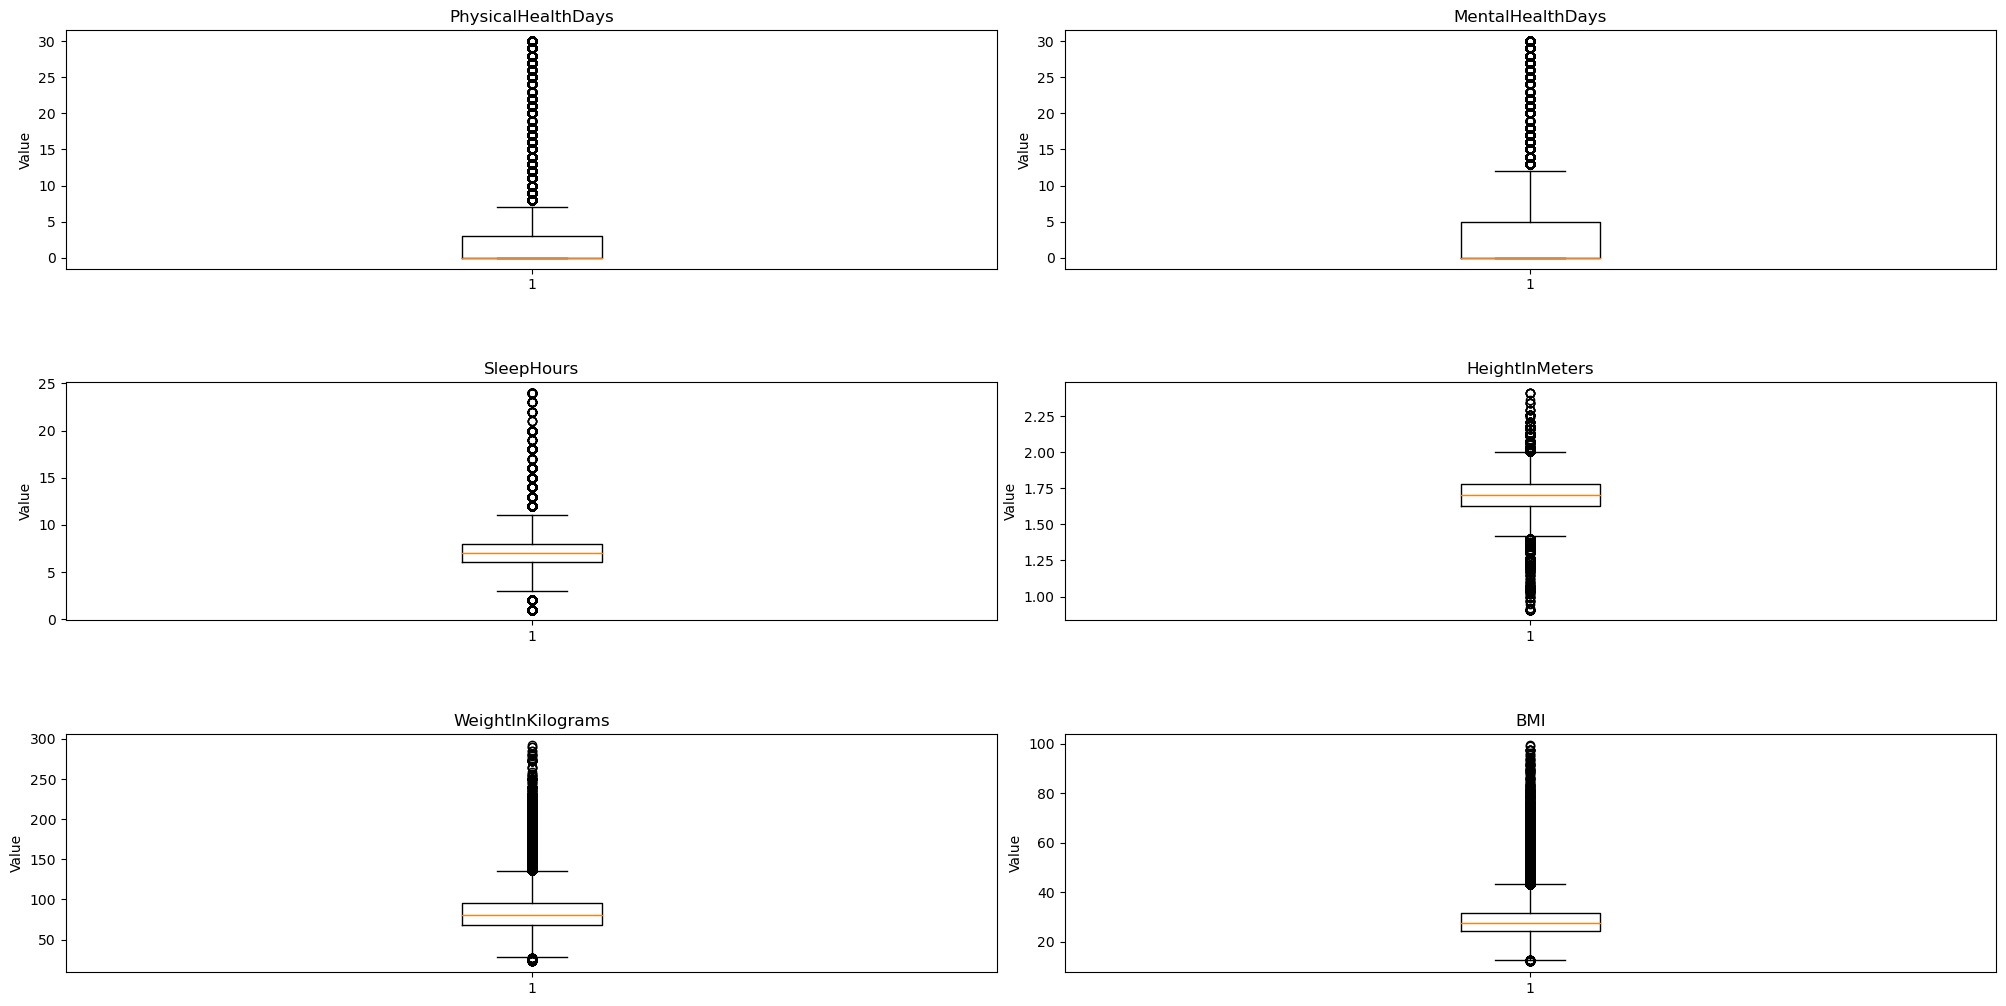

In [128]:
print("Boxplot Numerical Column Analysis")

# Setting the subplot layouts
plt.subplots(3, 2, figsize=(20, 10))

# Obtaining only numeric columns
numeric_columns = heart_attack_raw.select_dtypes(include=['number']).columns

# Plotting histograms
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    plt.boxplot(heart_attack_raw[column].dropna())
    plt.title(column)
    plt.ylabel("Value")
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0)
plt.show()

---

**Correlation Matrix**

Raw Data Correlation Matrix

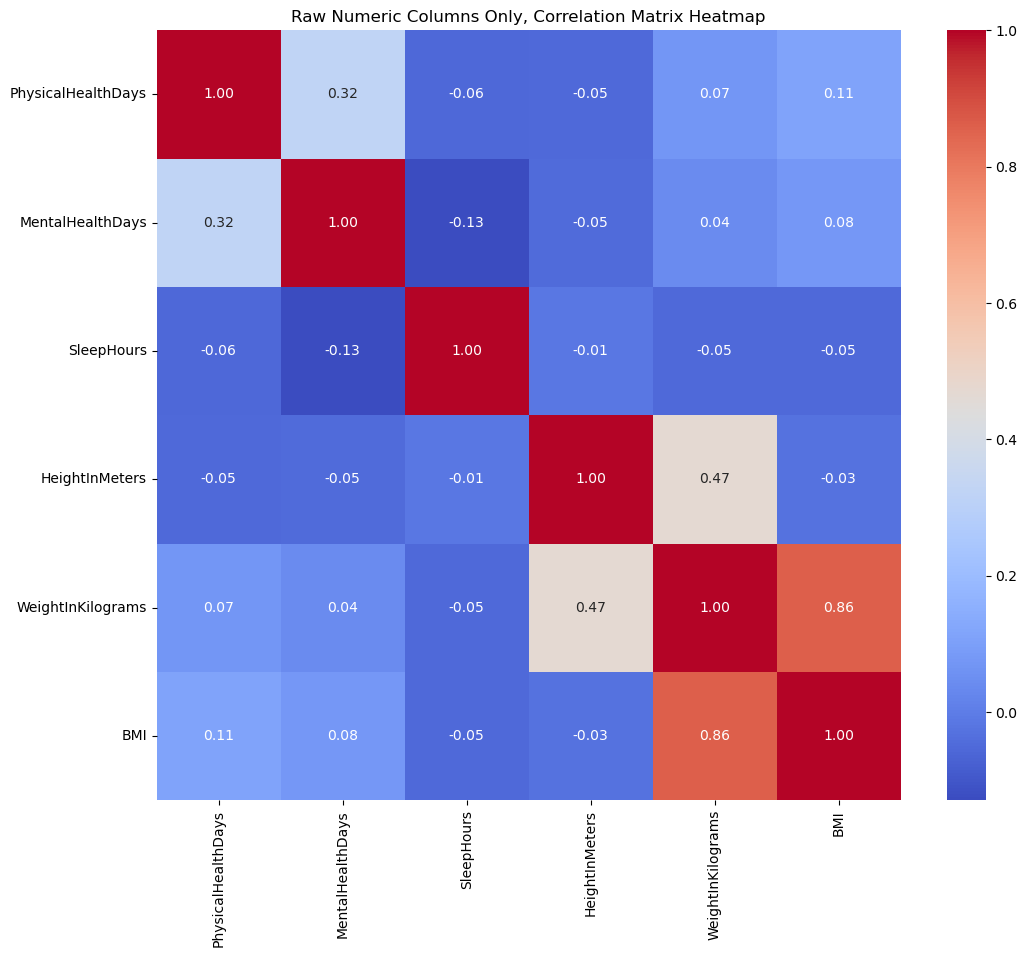

In [48]:
# Select only numerical columns
numeric_columns = heart_attack_raw.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Raw Numeric Columns Only, Correlation Matrix Heatmap')
plt.show()

Clean Data Correlation Matrix

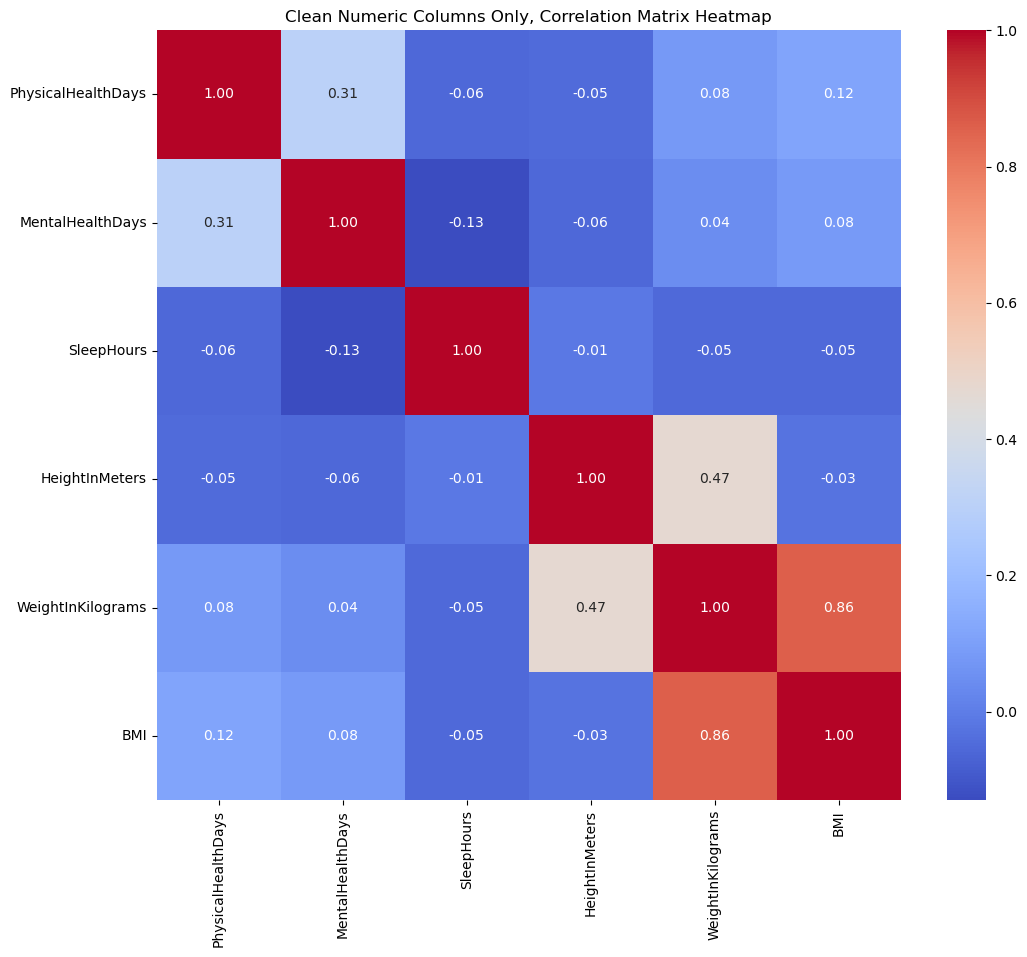

In [51]:
# Select only numerical columns
numeric_columns = heart_attack_clean.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Clean Numeric Columns Only, Correlation Matrix Heatmap')
plt.show()

**Numeric Only Correlation Matrix - Comments**

Within the numerical columns only, the heatmap shows there is a correlation between:

- BMI and WeightinKilograms
- WeightinKilograms and HeightinMeters
- MentalHealthDays and PhysicalHealthDays

---

**Correlation Matrix Analysis**

In [ ]:
for cat_col in heart_attack_clean.select_dtypes(include=['object']).columns:
    for num_col in heart_attack_clean.select_dtypes(include=['float64']).columns:
        plt.figure()
        sns.boxplot(x=cat_col, y=num_col, data=heart_attack_clean)
        plt.title(f'{num_col} by {cat_col}')
        plt.xticks(rotation=90)
        plt.show()

---

**Saving the Clean Data**

In [44]:
print("\033[1mSaving the Cleaned Dataframe:\033[0m\n")

try:
    heart_attack_clean.to_csv('heart_attack_clean.csv')
    print("Data saved successfully.")
except:
    print("ERROR: The data has NOT been saved.")

Saving the Cleaned Dataframe:

Data saved successfully.


---

---